Dataset shape: (569, 31)

First few rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  wor

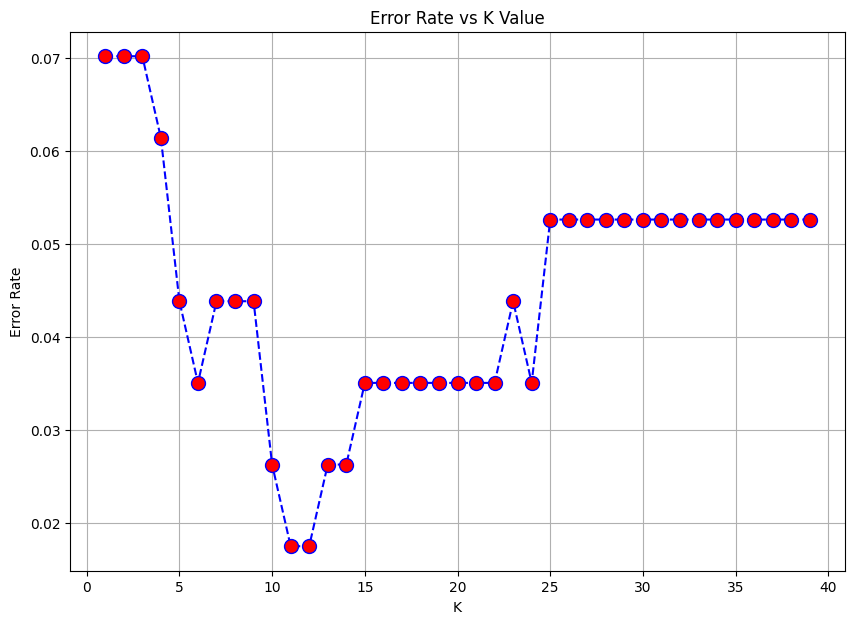


Optimal K value: 11
Minimum error rate: 0.0175
Maximum accuracy: 0.9825

Final model performance with K=11:
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[41  2]
 [ 0 71]]


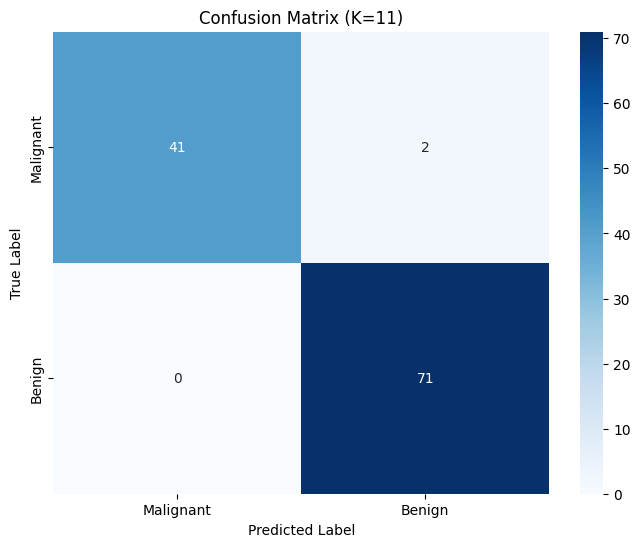

In [2]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import the dataset
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target #initiating the target variable

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nTarget distribution:")
print(df['target'].value_counts())#value.count is a function in pandas that says how many values are there in particular column

# 3. Split data into training and testing
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 4. Check the model performance for different values of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize an array that stores the error rates
error_rates = []

# Try checking the error rates for various values of K
for k in range(1, 40):#range depends on training data set higher, higher the range, we dont want k to be greater than under root (n, training data set)
    knn = KNeighborsClassifier(n_neighbors=k)#knn is variable, k is storing whatever value in the loop is happening and then assinging in to n_neighbors but then knn is like storing algorithm thats happening
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)#calculating the distance between current datasets and surrounding data sets
    
    # Calculate error rate (1 - accuracy)
    error_rate = 1 - accuracy_score(y_test, pred)#y_test=what is the thing u want to find optimal , pred is current data point
    error_rates.append(error_rate)
    
    # Print accuracy for each K value
    accuracy = accuracy_score(y_test, pred)
    print(f"K={k}: Accuracy = {accuracy:.4f}, Error Rate = {error_rate:.4f}")

# Plotting error rates for different values of K
plt.figure(figsize=(10, 7))
plt.plot(range(1, 40), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Find the optimal K value (minimum error rate)
optimal_k = error_rates.index(min(error_rates)) + 1# basically finding k with minimum error ( using index function, whatever current data point whatever has least amount of error give that)containts data point which has minimal error rate
min_error_rate = min(error_rates)#contains the min error rate 
print(f"\nOptimal K value: {optimal_k}")
print(f"Minimum error rate: {min_error_rate:.4f}")
print(f"Maximum accuracy: {1 - min_error_rate:.4f}")

# Train the final model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)
final_predictions = final_knn.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"\nFinal model performance with K={optimal_k}:")
print(f"Accuracy: {final_accuracy:.4f}")

# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, final_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()